In [1]:
import os
import pandas as pd

path = r"C:\Users\Administrator\Documents\IPL Data"

os.chdir(path)

os.listdir(path)

ball = pd.read_excel("Ball_by_Ball.xlsx")

match = pd.read_excel("Match.xlsx")

player = pd.read_excel("Player.xlsx")

player_match = pd.read_excel('Player_Match.xlsx')

season = pd.read_excel('Season.xlsx')

team = pd.read_excel('Team.xlsx')

In [2]:
ball.head()

,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,1,5,1,2,2,2,1,14,0,,,,,


In [6]:
ball = ball[ball.Striker_Id==8]
ball.head()

,Match_Id,Striker_Id,Batsman_Scored
132,335987,8,0
133,335987,8,0
134,335987,8,1
137,335987,8,0
138,335987,8,0


In [7]:
match.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,2008-04-19,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,2008-04-19,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,2008-04-20,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,2008-04-20,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India


In [8]:
virat_kohli = ball[['Match_Id','Striker_Id','Batsman_Scored']]
virat_kohli.head()

,Match_Id,Striker_Id,Batsman_Scored
132,335987,8,0
133,335987,8,0
134,335987,8,1
137,335987,8,0
138,335987,8,0


In [9]:
virat_kohli_1 = pd.merge(virat_kohli, match[["Match_Id","Venue_Name"]], left_on="Match_Id",right_on="Match_Id",how="left")
virat_kohli_1.head()

,Match_Id,Striker_Id,Batsman_Scored,Venue_Name
0,335987,8,0,M Chinnaswamy Stadium
1,335987,8,0,M Chinnaswamy Stadium
2,335987,8,1,M Chinnaswamy Stadium
3,335987,8,0,M Chinnaswamy Stadium
4,335987,8,0,M Chinnaswamy Stadium


In [11]:
virat_kohli_2 = virat_kohli_1.groupby(["Match_Id","Venue_Name"])["Batsman_Scored"].sum().reset_index()
virat_kohli_2.head()

,Match_Id,Venue_Name,Batsman_Scored
0,335987,M Chinnaswamy Stadium,1
1,335990,Wankhede Stadium,23
2,335997,M Chinnaswamy Stadium,13
3,336001,M Chinnaswamy Stadium,12
4,336003,Feroz Shah Kotla,1


In [29]:
virat_kohli_2_sort = virat_kohli_2.sort_values(by="Batsman_Scored",ascending=False)
virat_kohli_2_sort.head()

,Match_Id,Venue_Name,Batsman_Scored
127,981004,M Chinnaswamy Stadium,113
122,980974,M Chinnaswamy Stadium,108
125,980992,M Chinnaswamy Stadium,105
119,980942,Saurashtra Cricket Association Stadium,100
81,598059,Feroz Shah Kotla,99


In [34]:
virat_kohli_2_sort = virat_kohli_2_sort.groupby("Venue_Name")["Batsman_Scored"].sum().reset_index()
virat_kohli_2_sort.sort_values(by="Batsman_Scored",ascending=False).head()

,Venue_Name,Batsman_Scored
8,M Chinnaswamy Stadium,1759
16,"Rajiv Gandhi International Stadium, Uppal",292
9,"MA Chidambaram Stadium, Chepauk",285
27,Wankhede Stadium,280
4,Feroz Shah Kotla,277


In [35]:
#Filter Top 5 Stadium from Dataset

virat_kohli_2_sort = virat_kohli_2_sort[(virat_kohli_2_sort.Venue_Name=="M Chinnaswamy Stadium")|(virat_kohli_2_sort.Venue_Name=="Rajiv Gandhi International Stadium, Uppal")|(virat_kohli_2_sort.Venue_Name=="MA Chidambaram Stadium, Chepauk")|(virat_kohli_2_sort.Venue_Name=="Wankhede Stadium")|(virat_kohli_2_sort.Venue_Name=="Feroz Shah Kotla")]
virat_kohli_2_sort.head()

,Venue_Name,Batsman_Scored
4,Feroz Shah Kotla,277
8,M Chinnaswamy Stadium,1759
9,"MA Chidambaram Stadium, Chepauk",285
16,"Rajiv Gandhi International Stadium, Uppal",292
27,Wankhede Stadium,280


In [36]:
#Importing library for boxplot visulization
import matplotlib.pyplot as plt

In [37]:
import seaborn as sns

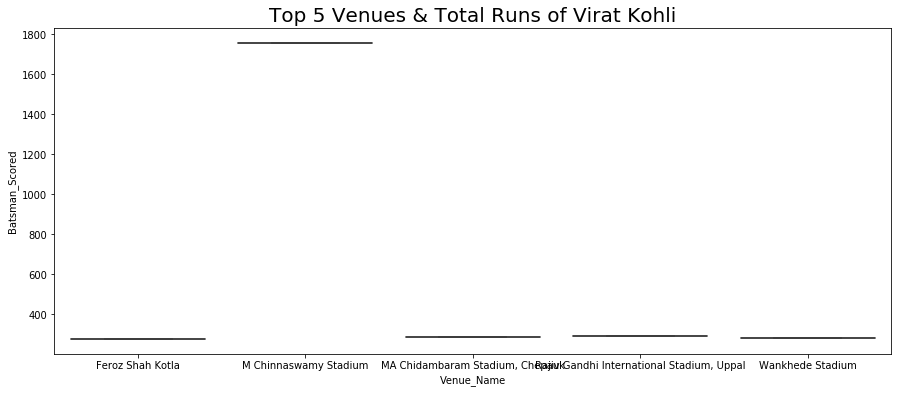

In [39]:
plt.rcParams["figure.figsize"]=15,6
sns.boxplot(data=virat_kohli_2_sort, x = "Venue_Name",y = "Batsman_Scored")

plt.title("Top 5 Venues & Total Runs of Virat Kohli",fontsize=20)
plt.show()



In [3]:
list(match)

['Match_Id',
 'Match_Date',
 'Team_Name_Id',
 'Opponent_Team_Id',
 'Season_Id',
 'Venue_Name',
 'Toss_Winner_Id',
 'Toss_Decision',
 'IS_Superover',
 'IS_Result',
 'Is_DuckWorthLewis',
 'Win_Type',
 'Won_By',
 'Match_Winner_Id',
 'Man_Of_The_Match_Id',
 'First_Umpire_Id',
 'Second_Umpire_Id',
 'City_Name',
 'Host_Country']